In [11]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore') # ignore warnings message

# making all pandas columns visable with display command
pd.set_option('display.max_columns', 500)


# df = pd.read_csv('datasets/EPL_sort.csv', index_col=0)
df = pd.read_csv('datasets/data_test_onehot.csv')
# df = df.drop(columns = ['id', 'season', 'stage', 'date', 'match_api_id'])
# df = df.drop(columns = ['id', 'season', 'stage', 'date', 'match_api_id', 'home_team_api_id', 'away_team_api_id'])
df

,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,HM2,HM3,HM4,HM5,AM1,AM2,AM3,AM4,AM5,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP,final1,final2
0,0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,-14,1.0,0.0
1,0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,-11,1.0,0.0
2,1,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,-4,0.0,1.0
3,0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0,1.0,0.0
4,0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,7,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,0,0.74,0.458333,0.313253,0.531646,0.078947,0.078947,3,3,3,3,0,3,0,3,1,3,0,0,0,0,0,0,0,0,1.263158,0.052632,0.000000,0.078947,-2,1.0,0.0
376,0,0.57,0.427083,0.602410,0.658228,0.000000,0.026316,1,1,3,3,3,0,0,0,0,1,1,0,0,0,0,0,0,0,0.184211,-0.289474,-0.026316,0.131579,7,1.0,0.0
377,1,0.32,0.677083,0.614458,0.278481,0.000000,0.078947,1,0,1,1,3,3,3,3,3,0,0,0,0,0,0,0,0,0,-0.500000,1.131579,-0.078947,-0.236842,16,0.0,1.0
378,0,0.40,0.281250,0.530120,0.696203,0.000000,0.026316,1,1,3,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,-0.105263,-0.736842,-0.026316,0.052632,3,1.0,0.0


In [12]:
# Pre-processing before get the correlation value
# df.Result.replace(to_replace='H', value = 0, inplace = True)
# df.Result.replace(to_replace='D', value = 1, inplace = True)
# df.Result.replace(to_replace='A', value = 2, inplace = True)
# df.isnull().sum()

# df_dummies = pd.get_dummies(df)
# df_dummies.head()
# df

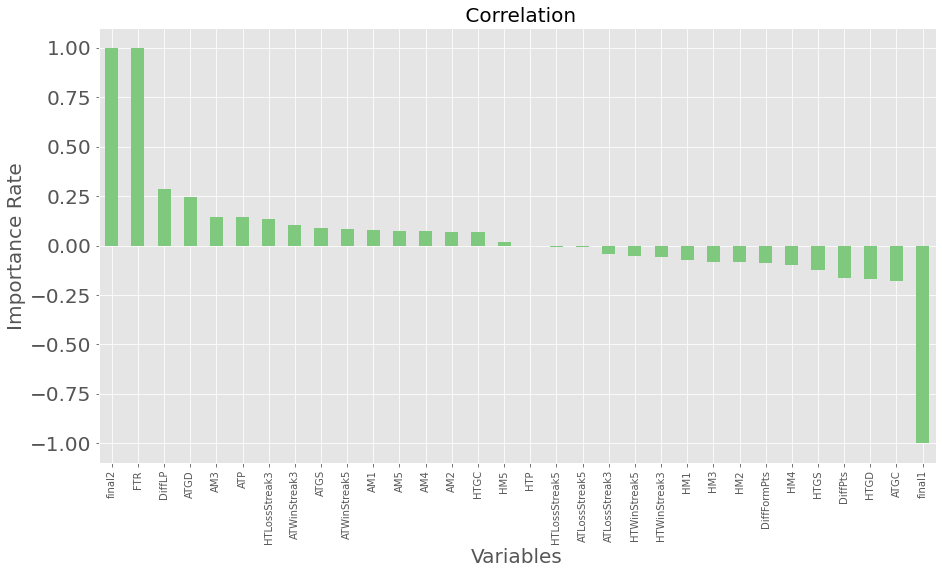

Most Positive Correlations: 
 final2    1.000000
FTR       1.000000
DiffLP    0.284411
ATGD      0.244443
AM3       0.142462
Name: FTR, dtype: float64

Most Negative Correlations: 
 HTGS      -0.120927
DiffPts   -0.164470
HTGD      -0.167820
ATGC      -0.180952
final1    -1.000000
Name: FTR, dtype: float64


In [13]:
#VISUALISATION
import matplotlib.pyplot as plt
#df_dum.corr()['is_promoted'].sort_values(ascending = False).plot(kind='bar')
import matplotlib.cm as cm
plt.figure(figsize=(15,8))
plt.style.use('ggplot')
my_cmap = cm.get_cmap('Accent')

correlations = df.corr()['FTR'].sort_values(ascending = False)
correlations.plot(kind='bar', cmap=my_cmap)

plt.title(' Correlation',fontsize=20)
plt.xlabel('Variables', fontsize=20)
plt.ylabel('Importance Rate',fontsize=20)

plt.xticks(fontsize = 10) 
plt.yticks(fontsize = 20) 
plt.grid(True)
plt.show() 

print('Most Positive Correlations: \n', correlations.head(5))
print('\nMost Negative Correlations: \n', correlations.tail(5))

## Predict

### Split data train an test

In [37]:
# X = df[['B365H', 'B365D', 'B365A','HTP', 'ATP']]
# X = df[['away_team_goal', 'B365H', 'away_possession','home_y_card']] # using top 5 highest features 
# X = df[['away_team_goal', 'B365H', 'away_possession','home_y_card','home_r_card', 'home_cross']]
X = df.drop(columns = ['FTR'])
y = df['FTR']

In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
columns = X_train.values.shape[1]
columns

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (285, 31)
Train labels shape:  (285,)
Test data shape:  (95, 31)
Test labels shape:  (95,)


### DECISION TREE

In [39]:
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn import metrics

modelDT = DT()
modelDT = modelDT.fit(X_train, y_train)
preds_DT = modelDT.predict(X_test)
print('Accuracy of DecisionTreeClassifier on test set: {:.2f}'.format(metrics.accuracy_score(y_test, preds_DT)))
print('Logistic Regression Confusion Matrix \n', metrics.confusion_matrix(y_test, preds_DT))

Accuracy of DecisionTreeClassifier on test set: 1.00
Logistic Regression Confusion Matrix 
 [[43  0]
 [ 0 52]]


### Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn import metrics

model_LR = LR(random_state=0)
# model_LR = model_LR.fit(X_train, y_train)
# pred_LR = model_LR.predict(X_test)

# print('Accuracy of Logistic Regression classifier on test set: {:.2f}'.format(metrics.accuracy_score(y_test, pred_LR)))
# print('Recall of Logistic Regression classifier on test set: {:.2f}'.format(metrics.recall_score(y_test, pred_LR)))
# print('Precision of Logistic Regression classifier on test set: {:.2f}'.format(metrics.precision_score(y_test, pred_LR)))
# print('F1-Score of Logistic Regression classifier on test set: {:.2f}'.format(metrics.f1_score(y_test, pred_LR)))
# print('AUC Score of Logistic Regression classifier on test set: {:.2f}'.format(metrics.roc_auc_score(y_test, pred_LR)))
# print('Logistic Regression Confusion Matrix = \n', metrics.confusion_matrix(y_test, pred_LR))

model_LR = model_LR.fit(X_train, y_train)
pred_LR = model_LR.predict(X_test)

print('Accuracy of Logistic Regression classifier on test set: {:.2f}'.format(metrics.accuracy_score(y_test, pred_LR)))
print('Logistic Regression Confusion Matrix \n', metrics.confusion_matrix(y_test, pred_LR))

Accuracy of Logistic Regression classifier on test set: 1.00
Logistic Regression Confusion Matrix 
 [[43  0]
 [ 0 52]]


### XGB Classifier

In [41]:
from xgboost import XGBClassifier

# get an instance from the clf
model_XGB = XGBClassifier()

# fit data
model_XGB.fit(X_train, y_train)

# predict unseen data
pred_XGB = model_XGB.predict(X_test)

print('Accuracy of XGBoost classifier on test set: {:.2f}'.format(metrics.accuracy_score(y_test, pred_XGB)))
print('XGBoost - Confusion Matrix \n', metrics.confusion_matrix(y_test, pred_XGB))

Accuracy of XGBoost classifier on test set: 1.00
XGBoost - Confusion Matrix 
 [[43  0]
 [ 0 52]]


### KERAS

In [42]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Activation, Flatten, Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam

# 41-75-3
# We first need to define the sequence of dependencies (the computational graph)
# x = Input(shape=(20,32))
x = Input(shape=(columns,))
# h = Conv2D(32, (7, 7), strides=(2, 2))(x)
# h = Activation('relu')(x)
h = Flatten()(x)
h = Dense(41)(h)
h = Dense(75)(h)
# for i in range(10):
#     h = Dense(75)(h)
h = Dropout(0.3)(h)
p = Activation('softmax')(h)

# Now that we have defined how to find p from x, we can create a 
# model simply by saying what is input and what is output
model = Model(inputs=x, outputs=p)
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.00001), metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 31)                0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 31)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 41)                1312      
_________________________________________________________________
dense_8 (Dense)              (None, 75)                3150      
_________________________________________________________________
dropout_1 (Dropout)          (None, 75)                0         
_________________________________________________________________
activation_4 (Activation)    (None, 75)                0         
Total params: 4,462
Trainable params: 4,462
Non-trainable params: 0
_________________________________________________________________


In [36]:
history = model.fit(X_train, y_train, batch_size=8, epochs=200, validation_split=0.04)

Train on 273 samples, validate on 12 samples
Epoch 1/200
273/273 [==============================] - 0s 341us/sample - loss: 3.6739 - acc: 0.2344 - val_loss: 3.3227 - val_acc: 0.2500
Epoch 2/200
273/273 [==============================] - 0s 291us/sample - loss: 3.5143 - acc: 0.2418 - val_loss: 3.2897 - val_acc: 0.2500
Epoch 3/200
273/273 [==============================] - 0s 304us/sample - loss: 3.5092 - acc: 0.2527 - val_loss: 3.2574 - val_acc: 0.2500
Epoch 4/200
273/273 [==============================] - 0s 318us/sample - loss: 3.5250 - acc: 0.2747 - val_loss: 3.2254 - val_acc: 0.3333
Epoch 5/200
273/273 [==============================] - 0s 319us/sample - loss: 3.4096 - acc: 0.3187 - val_loss: 3.1928 - val_acc: 0.3333
Epoch 6/200
273/273 [==============================] - 0s 280us/sample - loss: 3.4297 - acc: 0.2894 - val_loss: 3.1607 - val_acc: 0.3333
Epoch 7/200
273/273 [==============================] - 0s 285us/sample - loss: 3.3836 - acc: 0.2894 - val_loss: 3.1304 - val_acc: 0.3

273/273 [==============================] - 0s 372us/sample - loss: 2.3942 - acc: 0.4982 - val_loss: 1.9543 - val_acc: 0.5833
Epoch 61/200
273/273 [==============================] - 0s 331us/sample - loss: 2.3876 - acc: 0.4872 - val_loss: 1.9408 - val_acc: 0.5833
Epoch 62/200
273/273 [==============================] - 0s 356us/sample - loss: 2.4034 - acc: 0.4835 - val_loss: 1.9278 - val_acc: 0.5833
Epoch 63/200
273/273 [==============================] - 0s 360us/sample - loss: 2.4641 - acc: 0.4799 - val_loss: 1.9146 - val_acc: 0.5833
Epoch 64/200
273/273 [==============================] - 0s 319us/sample - loss: 2.2561 - acc: 0.5055 - val_loss: 1.8988 - val_acc: 0.5833
Epoch 65/200
273/273 [==============================] - 0s 331us/sample - loss: 2.2167 - acc: 0.5018 - val_loss: 1.8841 - val_acc: 0.5833
Epoch 66/200
273/273 [==============================] - 0s 334us/sample - loss: 2.1908 - acc: 0.5348 - val_loss: 1.8704 - val_acc: 0.5833
Epoch 67/200
273/273 [=========================

273/273 [==============================] - 0s 311us/sample - loss: 1.9048 - acc: 0.5641 - val_loss: 1.3904 - val_acc: 0.6667
Epoch 120/200
273/273 [==============================] - 0s 318us/sample - loss: 1.9996 - acc: 0.5165 - val_loss: 1.3842 - val_acc: 0.6667
Epoch 121/200
273/273 [==============================] - 0s 290us/sample - loss: 1.7837 - acc: 0.5824 - val_loss: 1.3781 - val_acc: 0.6667
Epoch 122/200
273/273 [==============================] - 0s 322us/sample - loss: 2.0526 - acc: 0.4872 - val_loss: 1.3725 - val_acc: 0.6667
Epoch 123/200
273/273 [==============================] - 0s 281us/sample - loss: 2.1328 - acc: 0.4872 - val_loss: 1.3672 - val_acc: 0.6667
Epoch 124/200
273/273 [==============================] - 0s 284us/sample - loss: 1.8102 - acc: 0.5934 - val_loss: 1.3605 - val_acc: 0.6667
Epoch 125/200
273/273 [==============================] - 0s 282us/sample - loss: 2.0630 - acc: 0.5055 - val_loss: 1.3564 - val_acc: 0.6667
Epoch 126/200
273/273 [==================

273/273 [==============================] - 0s 274us/sample - loss: 1.6236 - acc: 0.6190 - val_loss: 1.1363 - val_acc: 0.7500
Epoch 179/200
273/273 [==============================] - 0s 270us/sample - loss: 1.7233 - acc: 0.6007 - val_loss: 1.1319 - val_acc: 0.7500
Epoch 180/200
273/273 [==============================] - 0s 271us/sample - loss: 1.7659 - acc: 0.6264 - val_loss: 1.1286 - val_acc: 0.7500
Epoch 181/200
273/273 [==============================] - 0s 266us/sample - loss: 1.6586 - acc: 0.6190 - val_loss: 1.1250 - val_acc: 0.7500
Epoch 182/200
273/273 [==============================] - 0s 274us/sample - loss: 1.7812 - acc: 0.5897 - val_loss: 1.1222 - val_acc: 0.7500
Epoch 183/200
273/273 [==============================] - 0s 285us/sample - loss: 1.8071 - acc: 0.6081 - val_loss: 1.1195 - val_acc: 0.8333
Epoch 184/200
273/273 [==============================] - 0s 265us/sample - loss: 1.6786 - acc: 0.6044 - val_loss: 1.1171 - val_acc: 0.8333
Epoch 185/200
273/273 [==================